## 1. Import Lib

In [1]:
# Data Manipulation and Analysis
import numpy as np 
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection
from sklearn.feature_selection import mutual_info_classif


# Pipeline
from sklearn.pipeline import Pipeline, make_pipeline

# Transformers
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Preprocessors
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, QuantileTransformer, OneHotEncoder, LabelEncoder

# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# Cross validation
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, StratifiedKFold, KFold
from sklearn.model_selection import train_test_split

# Statistical Analysis
from scipy.stats import chi2_contingency

# Metrices
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import log_loss


# Hyperparameter Tuning
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner

# Tabulate
from tabulate import tabulate

# Warnings
import warnings

In [2]:
data = [
    ["FAVC", "Frequency of consumption of high-caloric food"],
    ["FCVC", "Frequency of consumption of vegetables"],
    ["NCP", "Number of main meals"],
    ["CAEC", "Consumption of food between meals"],
    ["SMOKE", "Smoking habit"],
    ["CH2O", "Daily water consumption"],
    ["SCC", "Calories consumption monitoring"],
    ["FAF", "Physical activity frequency"],
    ["TUE", "Time spent on sedentary activities (TV/Computer)"],
    ["CALC", "Consumption of alcohol"],
    ["MTRANS", "Mode of transportation used"],
    ["FHWO", "Family history withoverweight"]
]

table = tabulate(data, headers=["Id","Column", "Description"], tablefmt="orgtbl", numalign="center", stralign="left", showindex=True )

In [3]:
print(table)

|  Id  | Column   | Description                                      |
|------+----------+--------------------------------------------------|
|  0   | FAVC     | Frequency of consumption of high-caloric food    |
|  1   | FCVC     | Frequency of consumption of vegetables           |
|  2   | NCP      | Number of main meals                             |
|  3   | CAEC     | Consumption of food between meals                |
|  4   | SMOKE    | Smoking habit                                    |
|  5   | CH2O     | Daily water consumption                          |
|  6   | SCC      | Calories consumption monitoring                  |
|  7   | FAF      | Physical activity frequency                      |
|  8   | TUE      | Time spent on sedentary activities (TV/Computer) |
|  9   | CALC     | Consumption of alcohol                           |
|  10  | MTRANS   | Mode of transportation used                      |
|  11  | FHWO     | Family history withoverweight                    |


## 2. Import file

In [4]:
# import the obesity dataset csv files
df = pd.read_csv('data/train.csv')

In [5]:
df_obesity = df.copy()

In [6]:
df_obesity.drop(['id'], axis=1, inplace=True)

In [7]:
df_obesity.rename(columns={"family_history_with_overweight": "FHWO"}, inplace=True)

In [8]:
# Training dataset dimensions
print("Training Dataset :",df_obesity.shape)

Training Dataset : (20758, 17)


In [9]:
df_obesity.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'FHWO', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad'],
      dtype='object')

In [10]:
print("Misssing values in tranning dataset :", df_obesity.isna().sum().sum())

Misssing values in tranning dataset : 0


In [11]:
df_obesity.nunique()

Gender           2
Age           1703
Height        1833
Weight        1979
FHWO             2
FAVC             2
FCVC           934
NCP            689
CAEC             4
SMOKE            2
CH2O          1506
SCC              2
FAF           1360
TUE           1297
CALC             3
MTRANS           5
NObeyesdad       7
dtype: int64

In [12]:
df_obesity['NObeyesdad'].value_counts(normalize=True)

NObeyesdad
Obesity_Type_III       0.194913
Obesity_Type_II        0.156470
Normal_Weight          0.148473
Obesity_Type_I         0.140187
Insufficient_Weight    0.121544
Overweight_Level_II    0.121495
Overweight_Level_I     0.116919
Name: proportion, dtype: float64

<Axes: xlabel='NObeyesdad', ylabel='count'>

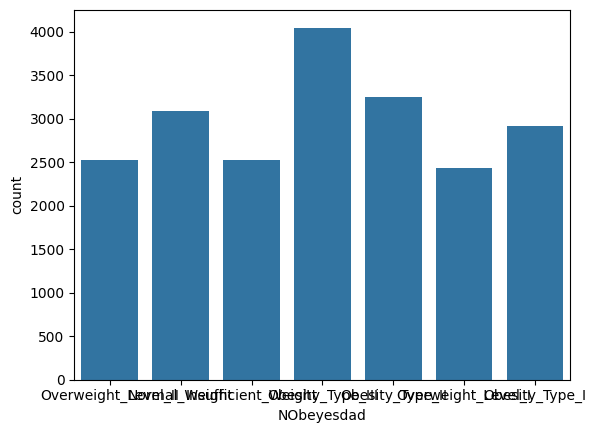

In [13]:
sns.countplot(data=df_obesity,x='NObeyesdad')

In [14]:
total_count = len(df_obesity)
total_count

20758

In [15]:
obesity_numerical_features = list(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'])
obesity_numerical_features

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [16]:
obesity_categorical_features = list(set(df_obesity.columns) - set(obesity_numerical_features))
obesity_categorical_features

['MTRANS',
 'FAVC',
 'CAEC',
 'Gender',
 'SCC',
 'FHWO',
 'CALC',
 'SMOKE',
 'NObeyesdad']

## Feature Engineering 

In [17]:
map_yesno = { 
            'yes' : 1,
            'no' : 0,
}

map_gender = {
            'Male' : 1,
            'Female' : 0,
}

map_CAEC = {
            'Sometimes' : 4,
            'Frequently' : 3,
            'Always' : 2,
            'no' : 1,
}

map_MTRANS = {
            'Public_Transportation' : 0,
            'Automobile' : 1,
            'Walking' : 2,
            'Motorbike' : 3,
            'Bike' : 4,
}

map_target = {
        'Insufficient_Weight': 0,
        'Normal_Weight': 1,
        'Overweight_Level_I': 2,
        'Overweight_Level_II': 3,
        'Obesity_Type_I': 4,
        'Obesity_Type_II': 5,
        'Obesity_Type_III': 6, 
}

map_CALC = {
        'Sometimes' : 1,
        'Frequently' : 2,
        'no' : 0
}

In [19]:
df_obesity['Gender'] = df_obesity['Gender'].map(map_gender) 
df_obesity['FHWO'] = df_obesity['FHWO'].map(map_yesno) 
df_obesity['FAVC'] = df_obesity['FAVC'].map(map_yesno) 
df_obesity['SMOKE'] = df_obesity['SMOKE'].map(map_yesno) 
df_obesity['SCC'] = df_obesity['SCC'].map(map_yesno)
df_obesity['CAEC'] = df_obesity['CAEC'].map(map_CAEC)
df_obesity['CALC'] = df_obesity['CALC'].map(map_CALC)
df_obesity['MTRANS'] = df_obesity['MTRANS'].map(map_MTRANS)
df_obesity['NObeyesdad'] = df_obesity['NObeyesdad'].map(map_target)

In [20]:
df_obesity

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,4,0,2.763573,0,0.000000,0.976473,1,0,3
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,3,0,2.000000,0,1.000000,1.000000,0,1,1
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,4,0,1.910378,0,0.866045,1.673584,0,0,0
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,4,0,1.674061,0,1.467863,0.780199,1,0,6
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,4,0,1.979848,0,1.967973,0.931721,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,4,0,2.151809,0,1.330519,0.196680,1,0,5
20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,3,0,1.000000,0,2.000000,1.000000,1,0,0
20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,4,0,2.000000,0,1.158040,1.198439,0,0,5
20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,4,0,2.144838,0,0.000000,0.973834,0,1,3


In [21]:

def feature_engineering(data):
    # BMI
    data['BMI'] = data['Weight'] / (data['Height'] ** 2)
    # Activity
    data['Activity'] = data['FAF'] * data['TUE']
    # Age group
    data['Age_Group'] = pd.cut(data['Age'], bins=[0, 18, 30, 45, float('inf')], labels=[0, 1, 2, 3])
    data['Age_Group'] = data['Age_Group'].astype(int)
    # Height group
    data['Height_Group'] = pd.cut(data['Height'], bins=[0, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, float('inf')], labels=[0, 1, 2, 3, 4, 5, 6])
    data['Height_Group'] = data['Height_Group'].astype(int)

In [ ]:
numerical_transformer = Pipeline(steps=[
    ('quantile', QuantileTransformer(output_distribution='normal')),
    ('scaler', RobustScaler())
])

In [22]:
feature_engineering(df_obesity)

In [24]:
df_obesity.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,Activity,Age_Group,Height_Group
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,4,0,...,0,0.000000,0.976473,1,0,3,28.259565,0.000000,1,2
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,3,0,...,0,1.000000,1.000000,0,1,1,23.422091,1.000000,0,1
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,4,0,...,0,0.866045,1.673584,0,0,0,17.126706,1.449399,0,3
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,4,0,...,0,1.467863,0.780199,1,0,6,44.855798,1.145225,1,3
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,4,0,...,0,1.967973,0.931721,1,0,3,25.599151,1.833602,2,5


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')

## Skew 

In [25]:
obesity_numerical_features
# identify skewness

skewness = df_obesity[obesity_numerical_features].skew()
print("Skewness of each column:")
print(skewness)

skewed_columns = skewness[abs(skewness) > 0.75].index.tolist()

# Showing the skewed columns
print("Number of skewed columns:", len(skewed_columns))
print("Skewed columns:")
print(skewed_columns)

Skewness of each column:
Age       1.586252
Height    0.015803
Weight    0.093187
FCVC     -0.356611
NCP      -1.562253
CH2O     -0.212506
FAF       0.505726
TUE       0.670411
dtype: float64
Number of skewed columns: 2
Skewed columns:
['Age', 'NCP']


## Modeling

In [26]:
df_obesity['Age'] = np.log1p(df_obesity['Age'])
df_obesity['NCP'] = np.log1p(df_obesity['NCP'])

In [27]:
# df_obesity.to_csv('data/train_process.csv')

In [28]:
X = df_obesity.drop('NObeyesdad', axis= 1)
y = df_obesity['NObeyesdad']

In [29]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,Activity,Age_Group,Height_Group
9958,1,2.890372,1.770000,97.000000,1,1,3.000000,1.386294,2,0,2.000000,0,3.000000,1.000000,0,1,30.961729,3.000000,0,3
7841,1,3.164107,1.753389,54.877111,1,1,2.000000,1.609438,4,0,2.000000,0,2.000000,1.000000,0,0,17.849855,2.000000,1,3
9293,1,3.128440,1.819867,122.024954,1,1,3.000000,1.356046,4,0,1.645338,0,0.739881,0.000000,1,0,36.844219,0.000000,1,4
15209,0,3.737670,1.580000,80.000000,1,1,2.000000,1.386294,4,0,1.000000,0,0.000000,0.000000,1,1,32.046146,0.000000,2,1
16515,1,3.178054,1.800000,95.000000,1,0,3.000000,1.386294,4,0,3.000000,0,2.000000,1.000000,2,0,29.320988,2.000000,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0,2.944439,1.722461,80.442775,1,1,2.628791,1.270573,4,0,1.844645,0,0.288032,0.722276,0,0,27.113666,0.208039,0,3
11964,1,3.135494,1.750000,95.000000,1,0,3.000000,1.386294,4,0,2.000000,0,3.000000,0.000000,1,0,31.020408,0.000000,1,3
5390,1,3.091042,1.620000,68.000000,0,1,2.000000,1.386294,2,0,3.000000,0,2.000000,0.000000,1,0,25.910684,0.000000,1,2
860,0,3.295837,1.650125,111.939671,1,1,3.000000,1.386294,4,0,2.770732,0,0.000000,0.237307,1,0,41.110271,0.000000,1,2


### XGBOOST

In [37]:


# Define the objective function
def objective_xgb(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 0, 4),
        'objective': 'multi:softmax',
        'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
        'num_class': 7,
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'subsample': trial.suggest_float('subsample', 0.1, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),
        'gamma': trial.suggest_float('gamma', 0.1, 1),
        'random_state': 42,
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),  # renamed for consistency
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'booster': 'gbtree',
        'tree_method': 'gpu_hist',  
        'verbosity': 1
    }
    
    stratified_kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    xgb_model = XGBClassifier(**param)
    
    accuracies = []

    # Perform Stratified K-Fold Cross Validation
    for train_index, test_index in stratified_kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        xgb_model.fit(X_train, y_train)
        y_pred = xgb_model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    mean_accuracy = np.mean(accuracies)
    return mean_accuracy

# Set up the study with TPESampler and MedianPruner
tpesampler = optuna.samplers.TPESampler(seed=42)
pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)

if __name__ == "__main__":
    study = optuna.create_study(direction='maximize', sampler=tpesampler, pruner=pruner)
    study.optimize(objective_xgb, n_trials=10, n_jobs=-1, show_progress_bar=True)
    
    best_params = study.best_params
    XGB_best_mean_accuracy = study.best_value
    
    # Display results
    print("\nBest Parameters:")
    for param, value in best_params.items():
        print(f"  {param}: {value}")
    print(f"\nBest Mean Accuracy: {XGB_best_mean_accuracy:.4f}")
    
    # Save best parameters for further use
    XGB_best = best_params

[I 2024-11-06 21:27:52,166] A new study created in memory with name: no-name-67497ddc-3670-4b13-8bb9-ab0b6ac529c0


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-06 21:28:38,231] Trial 3 finished with value: 0.8148184878241288 and parameters: {'n_estimators': 61, 'learning_rate': 0.013076335803972126, 'max_depth': 1, 'grow_policy': 'lossguide', 'min_child_weight': 3, 'subsample': 0.11631512230487401, 'colsample_bytree': 0.3257483329887747, 'gamma': 0.12026132028968083, 'reg_lambda': 0.06373448437148876, 'reg_alpha': 0.24088728830385964}. Best is trial 3 with value: 0.8148184878241288.
[I 2024-11-06 21:29:02,799] Trial 8 finished with value: 0.8746989344661884 and parameters: {'n_estimators': 71, 'learning_rate': 0.06967386747136214, 'max_depth': 2, 'grow_policy': 'depthwise', 'min_child_weight': 2, 'subsample': 0.3986619537460666, 'colsample_bytree': 0.7159962787824882, 'gamma': 0.11178926876836787, 'reg_lambda': 0.04104530601884104, 'reg_alpha': 0.9837297482393597}. Best is trial 8 with value: 0.8746989344661884.
[I 2024-11-06 21:29:05,345] Trial 6 finished with value: 0.8657866843094923 and parameters: {'n_estimators': 99, 'learnin

Best Parameters:
  n_estimators: 156
  learning_rate: 0.0834925109799299
  max_depth: 0
  grow_policy: depthwise
  min_child_weight: 3
  subsample: 0.3673094537399475
  colsample_bytree: 0.4334021441516963
  gamma: 0.6127109317530279
  reg_lambda: 0.669775313618659
  reg_alpha: 0.9044311131309759

In [38]:
XGB = XGBClassifier(**XGB_best)

In [39]:
# Fit the model on your training data
XGB.fit(X_train, y_train)

# Predict on test data
y_pred = XGB.predict(X_validation)

# Calculate the accuracy
accuracy = accuracy_score(y_validation, y_pred)
print(f"Accuracy with optimized parameters: {accuracy}")

Accuracy with optimized parameters: 0.9092003853564548


### Logistic Regression

In [42]:
def objective_logistic(trial):
    param = {
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'C': trial.suggest_float('C', 0.1, 10),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'saga']),
        'max_iter': trial.suggest_int('max_iter', 1000, 5000),
        'random_state': 42,
        'warm_start': True
    }
    
    # Scale the features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    stratified_kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    lr_model = LogisticRegression(**param)
    
    accuracies = []

    for train_index, test_index in stratified_kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        lr_model.fit(X_train, y_train)
        y_prob = lr_model.predict(X_test)

        accuracy = accuracy_score(y_test, y_prob)
        accuracies.append(accuracy)

    mean_accuracy = np.mean(accuracies)
    return mean_accuracy

tpesampler = optuna.samplers.TPESampler(seed=42)
pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)

if __name__ == "__main__":
    study = optuna.create_study(direction='maximize', sampler=tpesampler, pruner=pruner)
    study.optimize(objective_logistic, n_trials=10, n_jobs=-1, show_progress_bar=True)
    
    best_params = study.best_params
    LR_best_mean_accuracy = study.best_value
    
    LR_best = best_params
    
    print("\nBest Parameters:")
    for param, value in best_params.items():
        print(f"  {param}: {value}")
    print(f"\nBest Mean Accuracy: {best_accuracy:.4f}")


[I 2024-11-06 21:30:39,560] A new study created in memory with name: no-name-99c69ee1-c863-4516-99a8-cb8d1ea76f16


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-06 21:31:21,738] Trial 1 finished with value: 0.7622122246210274 and parameters: {'penalty': 'l2', 'C': 2.5490170143486623, 'solver': 'liblinear', 'max_iter': 1374}. Best is trial 1 with value: 0.7622122246210274.
[I 2024-11-06 21:31:23,817] Trial 5 finished with value: 0.7628867144880098 and parameters: {'penalty': 'l2', 'C': 5.5311900918062795, 'solver': 'liblinear', 'max_iter': 1982}. Best is trial 5 with value: 0.7628867144880098.
[I 2024-11-06 21:31:23,971] Trial 9 finished with value: 0.763079369501126 and parameters: {'penalty': 'l2', 'C': 8.338234559184091, 'solver': 'liblinear', 'max_iter': 4281}. Best is trial 9 with value: 0.763079369501126.
[I 2024-11-06 21:32:02,038] Trial 2 finished with value: 0.8656421524247279 and parameters: {'penalty': 'l2', 'C': 4.28883121636619, 'solver': 'saga', 'max_iter': 3628}. Best is trial 2 with value: 0.8656421524247279.
[I 2024-11-06 21:32:20,947] Trial 3 finished with value: 0.8653531118694431 and parameters: {'penalty': 'l2', 

Best Parameters:
  penalty: l1
  C: 0.6077440025605075
  solver: saga
  max_iter: 3950

In [43]:
LR = LogisticRegression(**LR_best)

LR.fit(X_train, y_train)

y_pred = LR.predict(X_validation)

accuracy = accuracy_score(y_validation, y_pred)
print(f"Accuracy with optimized parameters: {accuracy}")

Accuracy with optimized parameters: 0.850674373795761


c:\Users\vohoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Feature Importance

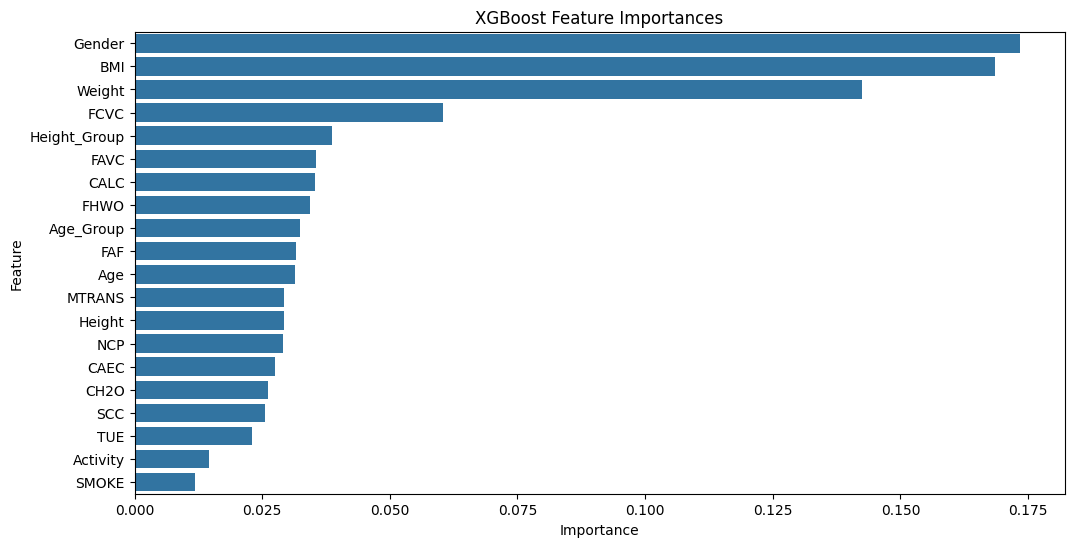

In [44]:
# XGB
features = ['Gender', 'Age', 'Height', 'Weight', 'FHWO', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI', 'Activity', 'Age_Group', 'Height_Group']
feature_importance_df = pd.DataFrame(
    {'Feature': features, 'Importance': XGB.feature_importances_}
)

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importances')
plt.show()

## Confusion Matrix

In [48]:
def matrices(model, name, X, y):
    
    predicted_classifier = model.predict(X)
    
    # Generate confusion matrix
    conf_matrices = confusion_matrix(y, predicted_classifier)

    # Plot confusion matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(conf_matrices, annot=True, fmt='d', cmap='crest', annot_kws={'fontsize': 10}, square=True)
    
    # Labels and Title
    plt.xlabel('Predicted', fontsize=10, color='black', fontweight='bold')
    plt.ylabel('Actual', fontsize=10, color='black', fontweight='bold')
    plt.xticks(fontsize=10, color='black')
    plt.yticks(fontsize=10, color='black')
    plt.title(f'Confusion Matrix with {name} Classifier', fontsize=12, fontweight='bold')
    
    # Show the plot
    plt.show()

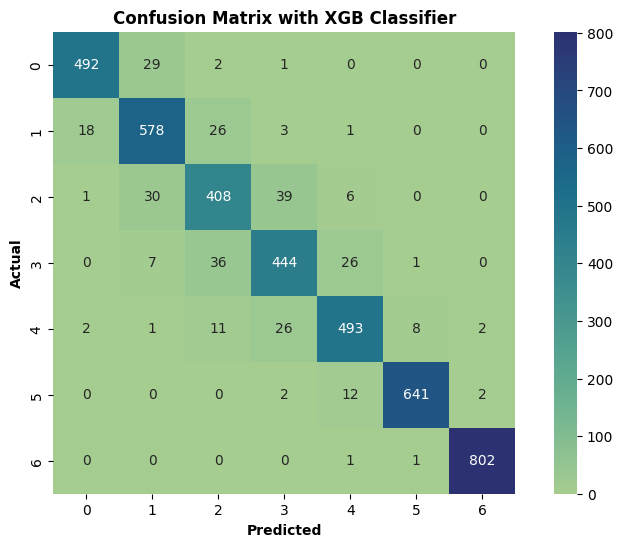

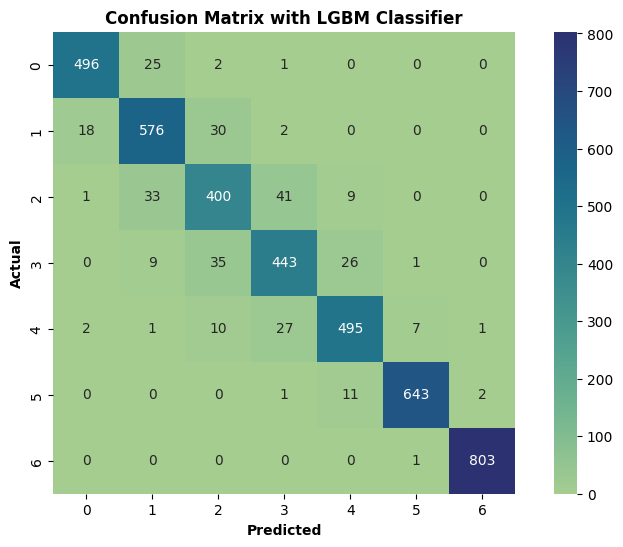

c:\Users\vohoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


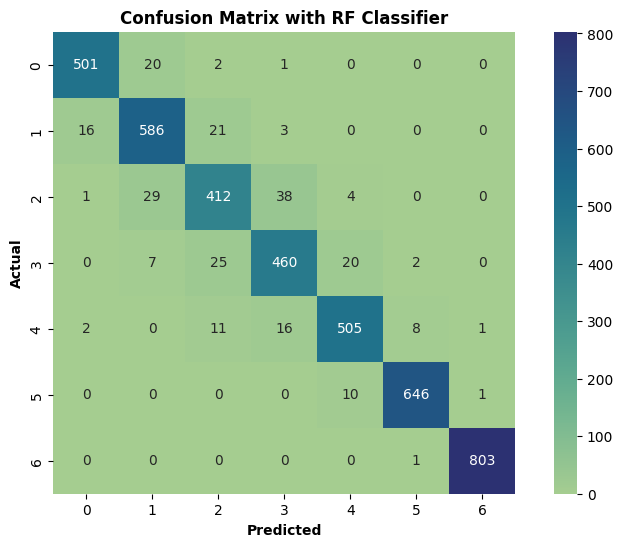

c:\Users\vohoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


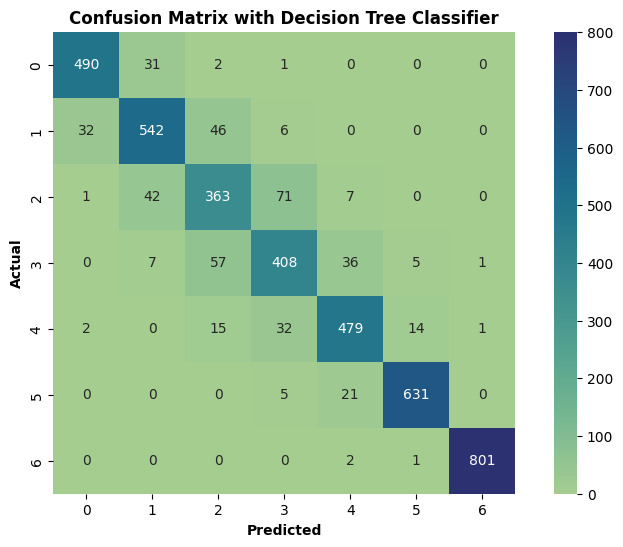

c:\Users\vohoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


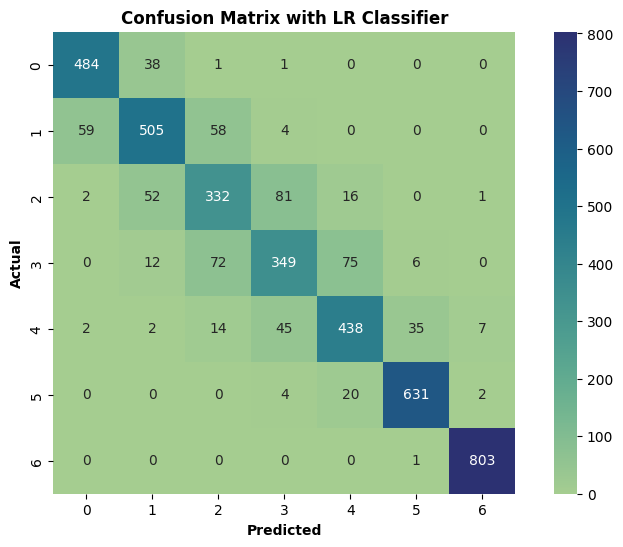

In [76]:
matrices(XGB, 'XGB',X_validation, y_validation)
matrices(LGBM, 'LGBM',X_validation, y_validation)
matrices(RF, 'RF',X_validation, y_validation)
matrices(decisionTree, 'Decision Tree',X_validation, y_validation)
matrices(LR, 'LR',X_validation, y_validation)